In [ ]:
# Import PyDrive and associated libraries
# This only needs to be done once per notebook
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
# This only needs to be done once per notebook
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '1zeDj29SCv16HQa1o85Xb-eZrXCKwT6pZ' # Check your own ID in GDrive
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('tweets.csv')  

In [ ]:
pip install contractions emoji

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, contractions, emoji
from wordcloud import WordCloud
sns.set_style('dark')

In [ ]:
df = pd.read_csv('tweets.csv',
                 lineterminator='\n')

In [ ]:
from textblob import TextBlob

In [ ]:
df['TBScore'] = df['Clean Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Convert polarity score into sentiment categories
df['Sentiment'] = df['TBScore'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 <a list of 7 Text major ticklabel objects>)

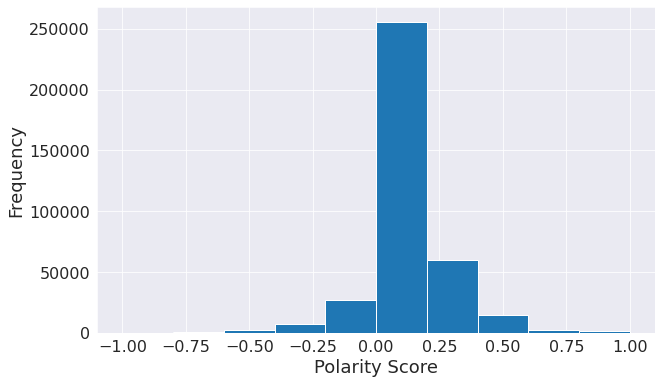

In [ ]:
fig = plt.figure(figsize=(10, 6))
df['TBScore'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

**Making wordclouds**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords_to_add = ['covid', 'via', 'v','a','c','c','i','n','e', 'people', 'get','getting','vaccination','vaccination', 'amp', 'vaccine', 'covid19', 'covidvaccine']
stop_words.extend(new_stopwords_to_add)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


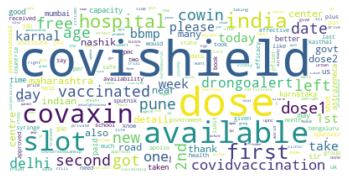

In [ ]:
pos_tweets=df[df["Sentiment"]=="Positive"]
txt=" ".join(tweet for tweet in pos_tweets["Clean Text"])
import re
line = re.sub('vaccine+', "", txt)

wordcloud = WordCloud(collocations = False,
                      background_color = 'white',
                      stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

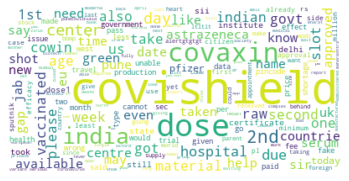

In [ ]:
neg_tweets=df[df["Sentiment"]=="Negative"]
txt=" ".join(tweet.lower() for tweet in neg_tweets["Clean Text"])
line = re.sub('vaccine+', "", txt)
wordcloud = WordCloud(collocations = False,background_color = 'white', stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def get_value_counts(col_name):
    count = pd.DataFrame(df[col_name].value_counts())
    percentage = pd.DataFrame(df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    return value_counts_df

In [ ]:
tb_sentiment_df = get_value_counts('Sentiment')
tb_sentiment_df

,sentiment,counts,percentage
0,Negative,30877,8.31
1,Neutral,191728,51.60
2,Positive,148976,40.09


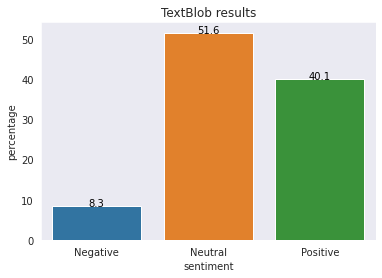

In [ ]:
ax = sns.barplot(x="sentiment", y="percentage", data=tb_sentiment_df)
ax.set_title('TextBlob results')

for index, row in tb_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

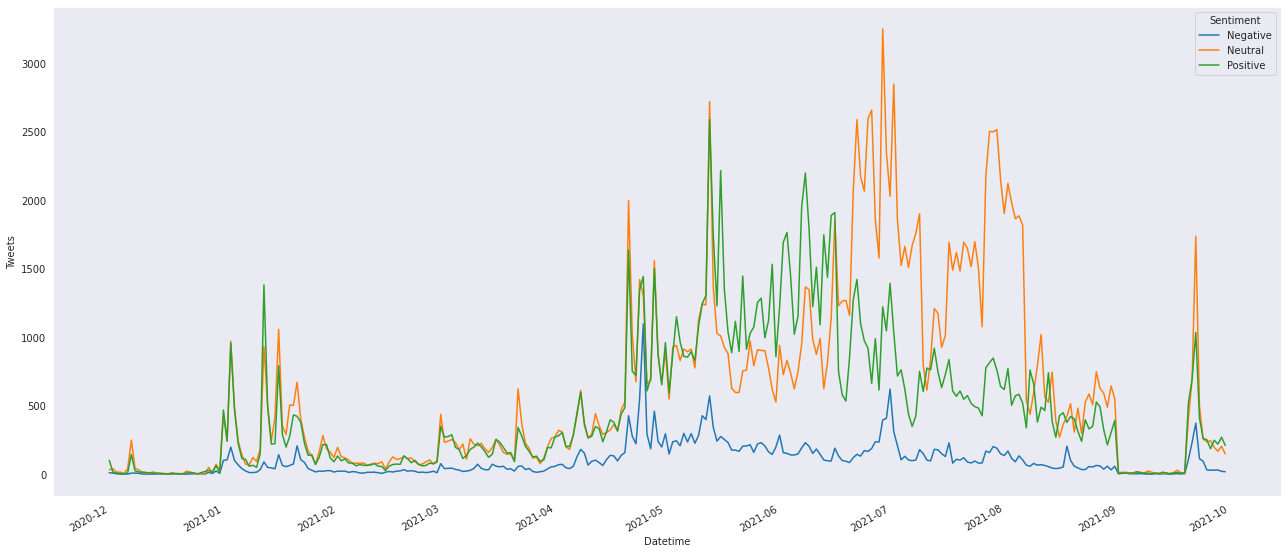

In [ ]:
# Plotting timeseries plot
df["Datetime"] = pd.to_datetime(df.Datetime) 
timeline = df.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
timeline.reset_index(inplace=True)
timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='Tweets')

plt.figure(figsize=(22,10))
ax = sns.lineplot(x="Datetime", y="Tweets", hue="Sentiment", data=timeline)
ax.figure.autofmt_xdate()

In [ ]:
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='TBScore', ascending=True)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)

,Text,TBScore,Username
0,"#EU_stopColonial With or w/o UK makes no sense,colonial mindset.\nEurope for 100s year ruthlessly ruled n ruined world not yet change mindset ruler Vs slaves.\nAstra Zeneca accepted why not Covishield? EU passengers for days quarantine in Indian conditions? https://t.co/UwYsh1WqfV",-1.0,KatratL
1,The price of the Covishield vaccine:\n\n1) India: ₹ 600\n2) Saudi Arabia: ₹ 395\n3)South Africa: ₹ 395\n4) US: ₹ 300\n5) Bangladesh: ₹ 300\n6)Brazil: ₹ 237\n7)UK: ₹ 226\n\nIndian GOV is worst to handle covid 19 https://t.co/412IwJkGst,-1.0,husenmulani7
2,"@nuts2406 @sibinmohan He took Pfizer I bet. At worst, Covishield. My bet is on Pfizer though .",-1.0,FreedomSutra
3,"@MISSXBUTTERFLYX Already happening.\nGo here, scroll to bottom and click Search Database.\nType in Covishield and go to ADR'S. Terrifying!\nhttps://t.co/eZvvLYC3MG",-1.0,SooziScoones
4,@MajorPoonia Sir sirf VIP and Politicians logon ko hi Covaxin mil raha hai...aam janta ko sirf Covishield hi diya ja raha hai....I lost my Maa inspite of she being vaccinated with Covishield. It's disgusting what's happening everywhere this differential treatment is happening,-1.0,shubha_1982
5,"↩️1. Mumbai airport worst affected by Covid, lost 81% flyers in 10 months \n↩️2. Interval between doses of Covishield extended to 4-8 weeks \n↩️3. Covid-19 vaccine: Virchow Biotech to make 200 m\n#TodayPharmanews\n#pharmarelatednews\n#bestpharmacynews\n#latestpharmacynews https://t.co/37uzbue0vg",-1.0,aiims_pharmacy
6,Terrible movement ....\nFire breaks out in serum institute of Pune which is the world's largest #COVID19 vaccine producer....\n\n#fireworks\n#Covishield\n #COVID19Vaccination \n#SerumInstituteofIndia https://t.co/MxYzO3UPJ4,-1.0,NilamPa57454782
7,This is not the queue for getting their 1st dose of Covishield or Covaxin..\n\nProviding Wealth to TN minister and CM.. by getting Alcohol...\n\nPathetic situation in TN \n\n@mkstalin @PMOIndia https://t.co/e6Oq7JsFD9,-1.0,haritcn
8,ವ್ಯಾಕ್ಸಿನ್ ವಾರ್: Tv9 Reveals Shocking Details Of Covaxin Vs Covishield Efficacy (Part-4)\n\nVideo Link ►https://t.co/0HdLisr9LY\n\n#TV9Kannada #ವ್ಯಾಕ್ಸಿನ್ವಾರ್ #VaccineWar #India #CovidVaccine #VaccineDistribution #CentralGovernment #KannadaNews https://t.co/tI7u0WVhZV,-1.0,tv9kannada
9,ವ್ಯಾಕ್ಸಿನ್ ವಾರ್: Tv9 Reveals Shocking Details Of Covaxin Vs Covishield Efficacy (Part-3)\n\nVideo Link ►https://t.co/gNEZLpTWHf\n\n#TV9Kannada #ವ್ಯಾಕ್ಸಿನ್ವಾರ್ #VaccineWar #India #CovidVaccine #VaccineDistribution #CentralGovernment #KannadaNews https://t.co/ejBkotu87M,-1.0,tv9kannada


In [ ]:
df.sort_values(by='TBScore', ascending=False)[['Text', 'TBScore', 'Username']].reset_index(drop=True).head(n=10)


,Text,TBScore,Username
0,"1st dose of covishield vaccine done. Excellent arrangements at Delhi Govt. School of Excellence, MPK. No queue, just a 20 mins observation time after taking the jab.\nDo take the vaccine as soon as you get the chance! @msisodia @SatyendarJain @AamAadmiParty https://t.co/TmO2SdnEBz",1.0,midnight__muse
1,@AnchorAnandN Which vaccine is best? \nCovaxin Or covishield,1.0,Trueliberal9
2,I got vaccinated! With Covishield! Let’s hope for the best now.,1.0,dasguptanandini
3,@dude_basu @sukhpreethind @vikramchandra @poornibv Covishield . Astra zeneca is a proven vaccine . It is not gaumutra . We in India can't get the best because our PM slept and didn't care . It is not the best for all ages . We have no choice get the vaccine .,1.0,KishanThar
4,@MadhuriDixit You are the greatest actress in 1995 to 2000 year. I have vaccinated with covishield. Thank q.,1.0,NRajakumar20
5,Which is best #Covaxin or #Covishield ?? \n\nPlease respond !!!,1.0,thota_J
6,"Best vaccines in India....???\n\n#COVISHIELD , #COVAXIN or #SPUTNIKV",1.0,hrpatel29
7,"@chetan_bhagat Can you compare what is best between Covaccine , covishield vs Pfizer Moderna",1.0,Nituveer
8,Excellent thread on a raging and pertinent topic thru d lens of #BioEthics #VaccineRollout #covaxin #Covishield https://t.co/ai7TP3aHvV,1.0,prodeeptoc
9,@chetan_bhagat What's the definition of the Best in this context compared to Covishield and Covaxin,1.0,ganeshram_gg


In [ ]:
df[(df['TBScore']> -0.05) & (df['TBScore']< 0.05)][['Text', 'Sentiment', 'Username']].reset_index(drop=True).head(n=10)

,Text,Sentiment,Username
0,"“Such lack of transparency is neither conducive for clinical research nor for public trust in the vaccine,"" says @AnantBhan regarding the alleged adverse event in the #Covishield trial. | @SaakhiChadha\nhttps://t.co/u4JI71NHg1",Neutral,QuintFit
1,"Govt’s perspective on the adverse event in @SerumInstIndia vaccine #covishield \n\nAN ADVERSE EVENT SEEN IN CLINICAL TRIAL OF SERUM INSTITITE VACCINE WILL NOT AFFECT THE TIMELINE OF THE #VACCINE PRODUCTION: Rajesh Bhushan, health secretary @MoHFW_INDIA",Neutral,Milan_reports
2,"After meeting with Prime Minister @narendramodi on November 28, #SII CEO @adarpoonawalla revealed that the company is in the process of applying for an emergency use license for #Covishield in the next two weeks.",Neutral,BiIndia
3,"@HLN_BE This is just the beginning. Coronavirus | ‘Covishield’ vaccine volunteer sues Serum Institute of India, Oxford Group over ‘adverse reaction’ - The Hindu https://t.co/Tzp1tnt1sw",Neutral,patriot_zee
4,Health Ministry reacts to claims against Covishield: 'Won't affect vaccine timeline' https://t.co/dx8PKpC831,Neutral,republic
5,"The #Covishield vaccine being manufactured by #SII is among the leading candidates for a #COVID19Vaccine around the world, locked in a race against the likes of #Pfizer, #Moderna and #SputnikV",Neutral,BiIndia
6,"Dr Shahid Jameel, Senior Virologist &amp; Director at @AshokaUniv: With the current manpower &amp; resources, it'll take the Govt 27 yrs to vaccinate all Indians. @ShereenBhan #Serum #Covid19 #CoronavirusVaccine #Covishield #Vaccine https://t.co/ryox93cDFz",Neutral,CNBCTV18News
7,"Dr @cspramesh, Director at @TataMemorial to @ShereenBhan: Have seen unprecedented level of collaboration &amp; co-operation between countries cutting across borders. #Serum #Covid19 #CoronavirusVaccine #Covishield #Vaccine https://t.co/0BTRrQlJTq",Neutral,CNBCTV18News
8,"Dubbed #covishield , the vaccine being developed by UK's #OxfordUniversity and the US pharma giant #AstraZeneca recently came under scrutiny after a 40-year old volunteer from Chennai claimed to suffer from neurological and psychological side effects as a result of the trials.",Neutral,BiIndia
9,Covishield has no side effects: Serum Institute of India https://t.co/QoLNknELiN #covishield #nosideeffects #seruminstituteofindia #covidvaccine,Neutral,newstrack_eng


In [ ]:
# VADER ANALYSIS
import nltk
nltk.download('vader_lexicon') # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
df['VScore'] = df['Clean Text'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
df['VComp'] = df['VScore'].apply(lambda score_dict: score_dict['compound'])

# Set threshold to define neutral sentiment
neutral_thresh = 0.05

# Categorize scores into the sentiments of positive, neutral or negative
df['Sentiment'] = df['VComp'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 <a list of 10 Text major ticklabel objects>)

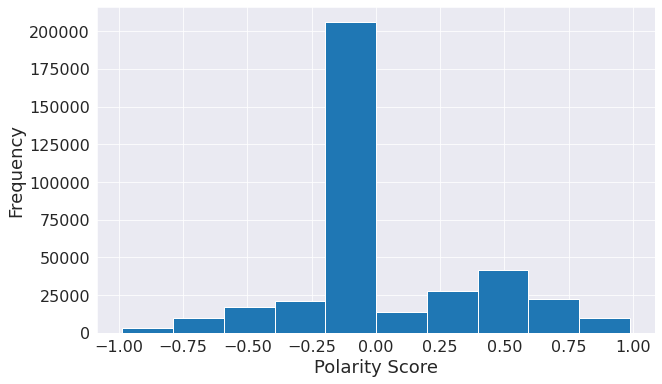

In [ ]:
fig = plt.figure(figsize=(10, 6))
df['VComp'].hist()
plt.xlabel('Polarity Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

**Making wordclouds**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords_to_add = ['covid', 'via', 'v','a','c','c','i','n','e', 'people', 'get','getting','vaccination','vaccination', 'amp', 'vaccine', 'covid19', 'covidvaccine']
stop_words.extend(new_stopwords_to_add)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


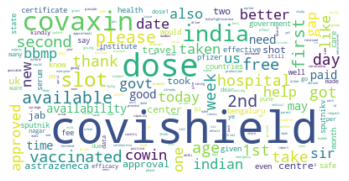

In [ ]:
pos_tweets=df[df["Sentiment"]=="Positive"]
txt=" ".join(tweet for tweet in pos_tweets["Clean Text"])
import re
line = re.sub('vaccine+', "", txt)

wordcloud = WordCloud(collocations = False,
                      background_color = 'white',
                      stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

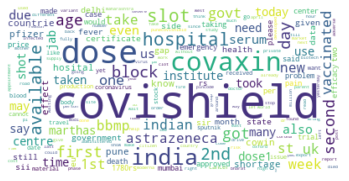

In [ ]:
neg_tweets=df[df["Sentiment"]=="Negative"]
txt=" ".join(tweet.lower() for tweet in neg_tweets["Clean Text"])
line = re.sub('vaccine+', "", txt)
wordcloud = WordCloud(collocations = False,background_color = 'white', stopwords=stop_words).generate(line)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def get_value_counts(col_name):
    count = pd.DataFrame(df[col_name].value_counts())
    percentage = pd.DataFrame(df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    return value_counts_df
tb_sentiment_df = get_value_counts('Sentiment')
tb_sentiment_df

,sentiment,counts,percentage
0,Negative,57782,15.55
1,Neutral,201337,54.18
2,Positive,112462,30.27


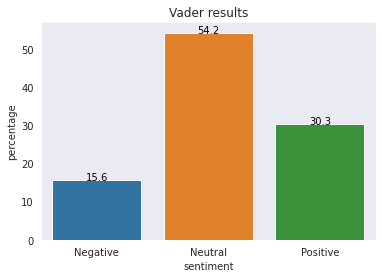

In [ ]:
ax = sns.barplot(x="sentiment", y="percentage", data=tb_sentiment_df)
ax.set_title('Vader results')

for index, row in tb_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

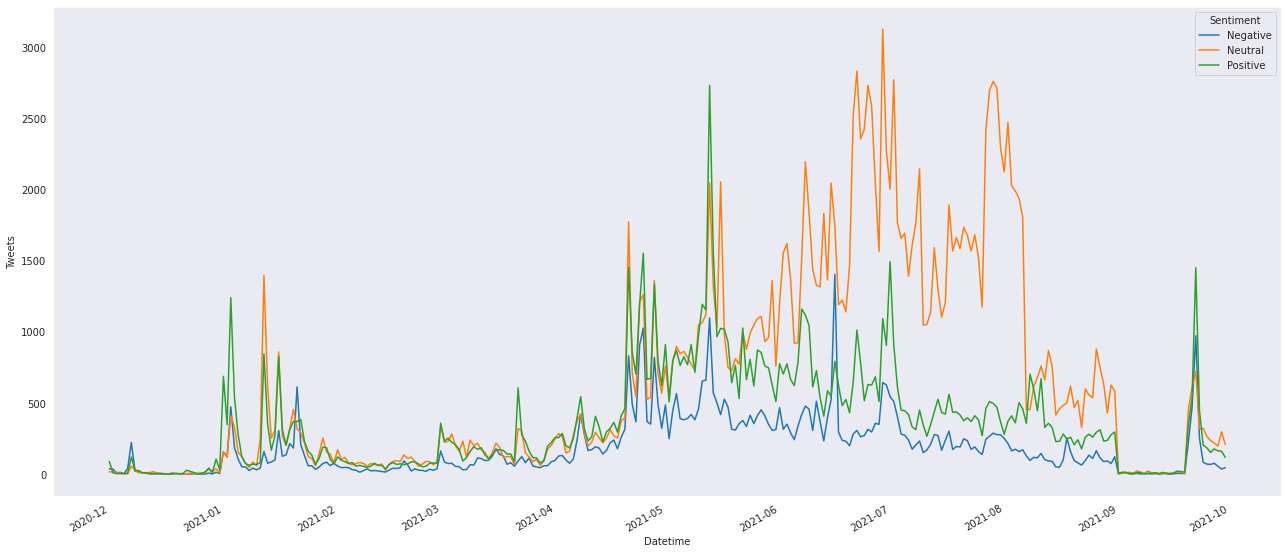

In [ ]:
df["Datetime"] = pd.to_datetime(df.Datetime) 
timeline = df.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
timeline.reset_index(inplace=True)
timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='Tweets')

plt.figure(figsize=(22,10))
ax = sns.lineplot(x="Datetime", y="Tweets", hue="Sentiment", data=timeline)
ax.figure.autofmt_xdate()

In [ ]:
pd.set_option('display.max_colwidth', 400)
df.sort_values(by='VComp', ascending=True)[['Text', 'VComp', 'Username']].reset_index(drop=True).head(n=10)

,Text,VComp,Username
0,@SaffronTommy Mask scam. HCQ scam. SII commissions scam. BB bribery scam. Covishield adulteration scam. Covaxin theft scam. Gandhi family out of turn vaccination scam. Rahul Gandhi PA arrested with ten kilos of cocaine.\n\nIndia defaults on sovereign debt. Moody and Fitch downgrade India credit.,-0.9854,ksub
1,"0.61 per million Covishield doses reported clotting, bleeding: Health ministry | Hindustan Times \n\nBut still brain dead sheeple will queue up to take this poisonous death shot! 🐑🧟💉 I weep at the plight of humanity! 🤦🏻‍♀️😭 https://t.co/4e5fECRQej",-0.9786,absolutaesthete
2,4 Death in my family due to #COVID19 with in 1month all after taking #Covishield vaccination.\nI am not sure but this vaccine have something wrong\nAll 4death confirmed negative report but symptoms for death is same\n\nIn my know 5 more people died after vaccination. Something Wong,-0.9771,hipertexter
3,@HappymonJacob Don't know about Covishield but the EU's institutions do foster a deadly combination of old timey imperial racism and new timey ethno-nationalist racism. Much less discussed than racism in America where there is at least a tradition of documenting and challenging racism.,-0.9769,SRoyChowdhury01
4,"@Swamy39 Nosense Information. Myself and Relatives-Friends Taken Covishield at Kolkata from Different Hospitals but No Side and Bad effect, No Bad News in Kolkata. Mr.Swamy should Reconsider the Statstics,Facts and Propaganda about Vaccination and Death Reports as MP",-0.9749,AnjanBa92533398
5,"@htTweets Why only COVAXIN??? \n\nWhy not COVISHIELD or SPUTNIK?? \n\nHe failed to control covid spread, failed in administration, failed to provide basic needs to poor and needy. \n\nCommunally crying on every one. \n\nMost sickest, stinking communally baised incapable CM https://t.co/ABAGWMrZct",-0.9744,SAYNOTOYSRCP
6,"@timesofindia Why putting pressure on vaccination, to stop death , Government must ban vaccination and close killer covid helpline until investigation is not done . Serum institute is not accepting request to conduct examination of death due to adverse effects of covishield vaccine",-0.9744,MehraDileep
7,"@amabirdman Side effects of #Covishield is such an hellish experience\nMine started with Fever Exactly after 8 hours of the injection , followed by terrible head ache and body ache\nHead ache is an understatement , and I literally could not get up as far as body pain went\nPrick region pain too",-0.9723,masala_dosai
8,@shooky0t7 I took covishield..\nBut damn my left arm hurts.. and my body is paining.. two different pain... I don even know what I should do...\nMy bro as no side effects whatsoever..he s snoring away to glory..not that he should 😭 but damn this is just 😩😩😩,-0.9721,HopeandSunshin3
9,"@kanimozhi My uncle got infected in Hyderabad and died even after both doses of covishield. The vaccine offers some protection. But in case you are very old, sick (diabetic, overweight) you could still fall very ill and in some cases die.",-0.9720,bvenkateshwaran


In [ ]:
df.sort_values(by='VComp', ascending=False)[['Text', 'VComp', 'Username']].reset_index(drop=True).head(n=10)

,Text,VComp,Username
0,"#HappyNewYear2021 #Master #aespa #success #covishield #AUSvIND #BiggBoss14 #Welcome2021 #KrackTrailer #Bye2020 God is source of peace perfection preserver of safety exalted in might supreme glory to God; creator, evolver. Whatever in Heavens on Earth declares His praise n glory",0.9870,KBegum9
1,Better efficacy than Oxford/covishield's 62%. Best in the inactivated type vaccine. Works against uk variant. Works on children. Huge export potential now! Will boost confidence in takers. Win win situation for all. Hope acceptance increases! #Covaxin https://t.co/sG7akQDFiK,0.9816,beingabhinav07
2,"Anna nijamgane buzy #prabhas anna max I wanna try to participate in dis trend most of the time but I couldn't 🤧😟🤧\n3hours back took my first shot of covishield dose ,,, always a proud fan of you long live prabhas🤗😁🤗\nLuv u luv u luv u always anna \n#PrabhasBdayFestin100Days https://t.co/bvIr5BvfVJ",0.9811,haribabutaurus
3,"@JawanSnow Covaxin ka aaya nahi hai final result but phase 1 and 2 are promising thus far,for safety and mutations like UK strain. Covishield hai tested and approved as effective. Covaxin if approved will be a blessing because its cost would be 500INR for two doses in open market.",0.9800,dylanhead94
4,"@drthomasisaac Dear Beloved Thomas sir. Hope you are safe and sound , may I kindly seek your help in availing second dose of covishield vaccine in Kannur area , if you may help sir. Please - My sincere Gratitude!",0.9790,krishna12264793
5,Got VACCINATED 1st DOSE of COVISHIELD at Khallikote clg ground.\nFaced some technical glitches but it was solved by the help of kind volunteers. Thanks TEAM GANJAM for such a dedicated service and smart procedure like Drive-in Vaccination. Jai Hind 🇮🇳 @BrahmapurCorp @Ganjam_Admin https://t.co/WHo67C8U50,0.9787,FrancisReagon
6,@AmbSibiGeorge Good to know that you are safe and recovering fast. Take good care. Can you also please help thousands of Indians stuck in India and waiting for MOH approval on Covishield vaccine….we need your sincere help support and action on this please. Namaste 🙏🏻,0.9786,IamSubikash
7,"Wow! the greatest new year gift for Indians , expert committee today recommends approval of Astra Zeneca Oxford Covishield Vaccine manufactured by Serum Inst of India after being satisfied about its safety and efficacy . 2021 truly starts off as the year of hope for humankind!",0.9783,_Heartmatters
8,"Wow ! the greatest new year gift for Indians , expert committee today recommends approval of Astra Zeneca Oxford Covishield Vaccine manufactured by Serum Inst of India after being satisfied about its safety and efficacy . 2021 truly starts off as the year of hope for humankind !",0.9783,Dr_AshokSeth
9,"@neerajmital @UnusualMonk @ShashankSArora Sir, truth is its easy to complain. Single does of covishield is also effective but we just want to hear the term fully vaccinated.\nCan we do better? of course yes.\nBut at the moment I cannot see any other leader who could do that.\nWd be happy to vote to any other capable leader.",0.9782,IamShreyas_K


In [ ]:
df[(df['VComp']> -0.05) & (df['VComp']< 0.05)][['Text', 'Sentiment', 'Username']].reset_index(drop=True).head(n=10)


,Text,Sentiment,Username
0,"Serum Institute denies side effects claim, says Covishield ‘safe and immunogenic https://t.co/NOcYw0qhsg",Neutral,jimiless
1,"Covishield ‘Safe And Immunogenic, Serum Institute Denies All Side Effects @SerumInstIndia \n\n#covid19 #covid19vaccine #Covishield #seruministituteofIndia #Coronavirusupdates #vaccineupdates \n\nhttps://t.co/tSEGm0O9oi",Neutral,HealthwireMedia
2,"BIO-BREAKING: Addressing concerns related to the serious adverse event reported by a volunteer in Chennai, @SerumInstIndia has called the ‘#Covishield’ vaccine safe &amp; immunogenic. Meanwhile, #DCGI is investigating the incident.\n\nMore: https://t.co/iYzyFMuhmm via @BioVoiceNews",Neutral,BiovoiceNews
3,Health Ministry reacts to claims against Covishield: 'Won't affect vaccine timeline' https://t.co/dx8PKpC831,Neutral,republic
4,"Dr Shahid Jameel, Senior Virologist &amp; Director at @AshokaUniv: With the current manpower &amp; resources, it'll take the Govt 27 yrs to vaccinate all Indians. @ShereenBhan #Serum #Covid19 #CoronavirusVaccine #Covishield #Vaccine https://t.co/ryox93cDFz",Neutral,CNBCTV18News
5,SII is developing Covid-19 vaccine - Covishield in partnership with UK's Oxford University and US pharma giant AstraZeneca.\n\nhttps://t.co/EbbP9uBrBo\n\n@SerumInstIndia @adarpoonawalla @UniofOxford \n\n#CovidVaccine #COVID19 #astrazeneca,Neutral,TrueScoopNews
6,Allegations Against 'Covishield' Vaccine Yet Human Trials Continue. Why? https://t.co/GrMjC8uiKC https://t.co/7FH8IyXIdI,Neutral,GulistanNewsTV
7,Pune-based #SerumInstituteofIndia could make the #CovidVaccine by #AstraZeneca-Oxford University available in India’s market after March-April next year.\n#covishield #CoronaVaccine #COVID19\n\nRead more: https://t.co/pPRvY4Vhos https://t.co/T4hvnAVs0X,Neutral,NewIndianXpress
8,"Initial causal assessment of findings related to the Chennai clinical trial participant did not necessitate stoppage of Covishield vaccine trials, says ICMR DG\n\n(by @viswanath_pilla) #Covishield #Vaccine #COVID19 \nhttps://t.co/Fq5lSYH2bE",Neutral,moneycontrolcom
9,"Serum Institute denies side effects claim, says Covishield safe and immunogenic\nClick on the link to Know More👉 https://t.co/qzN2sDWvhe https://t.co/YbGuA9i7jj",Neutral,vohglobal
